**2025 Military AI CONtest**<br>
AI Autonomous Driving – Pre-Training Code Sample<br> 
NVIDIA Jetson Nano/Wingbot/JupyterLab<br>
Version : v1.0<br>
File : line_where.ipynb


line left


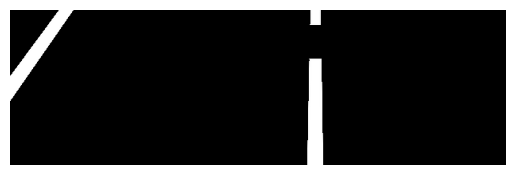

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('road_line.png')

h, w = img.shape[:2]
roi_y1 = int(h * 0.60)
roi_y2 = h
roi_x1 = int(w * 0.10)
roi_x2 = int(w * 0.75)

roi = img[roi_y1:roi_y2, roi_x1:roi_x2]

hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

# 흰색 범위
lower_white = np.array([0, 0, 200])
upper_white = np.array([180, 50, 255])

mask = cv2.inRange(hsv, lower_white, upper_white)

# 흰색 픽셀 위치 찾기
ys, xs = np.where(mask == 255)

if len(xs) > 0:
    line_center_x = int(np.mean(xs))          # 흰선 중심 X값
    frame_center_x = (roi.shape[1] // 2)      # ROI 중앙 X값

    if line_center_x < frame_center_x - 10:   # 왼쪽 치우침
        print("line left")
    elif line_center_x > frame_center_x + 10: # 오른쪽 치우침
        print("line right")
    else:
        print("line center")
else:
    print("line not detected")

# 결과 확인용
result = cv2.bitwise_and(roi, roi, mask=mask)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
